# Analysis Noun Class in R

This code is main edited by Enze Wang

# Attention

Please put four .csv file in data folder and put this code in main folder instead of code folder.

This code want to do test for business on whether add some serview or food to incease star rating. 

In [ ]:
if (!require(ggplot2)){
  install.packages("ggplot2")
}
if (!require(DAAG)){
  install.packages("DAAG")
}
if (!require(glmnet)){
  install.packages("glmnet")
}
if (!require(grid)){
  install.packages("grid")
}
if (!require(gridExtra)){
  install.packages("gridExtra")
}
if (!require(MASS)){
  install.packages("MASS")
}
if (!require(car)){
  install.packages("car")
}
if (!require(corrplot)){
  install.packages("corrplot")
}
if (!require(leaps)){
  install.packages("leaps")
}
if (!require(caret)){
  install.packages("caret")
}
if (!require(psych)){
  install.packages("psych")
}
if (!require(stats)){
  install.packages("stats")
}
if (!require(broom)){
  install.packages("broom")
}
if (!require(gbm)){
  install.packages("gbm")
}
if (!require(randomForest)){
  install.packages("randomForest")
}
if (!require(olsrr)){
  install.packages("olsrr")
}
if (!require(regclass)){
  install.packages("regclass")
}
if (!require(pROC)){
  install.packages("pROC")
}

In [2]:
Word_Matrix_Data=read.csv("data/Word_Count_Matrix.csv")
Review=read.csv("data/pizza_review.csv")
Noun_Variables_Translate=read.csv("data/Noun_Variables_Translate.csv")

In [3]:
ID_test=Word_Matrix_Data$review_id==Review$review_id
for(i in ID_test){
    if(i==FALSE){
        print(i)
    }
}

In [4]:
Review

X,review_id,user_id,business_id,stars,useful,funny,cool,text,date
<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
0,hfXVxrlD6fr1kXfz6sR13Q,7nIzgNF7YzI-UAyYr3y9hw,J9f-9Prw2YVM-fiZqv2fmQ,2,0,1,1,"Parking is tough to get here so I don't get to go much. I also get a little cautious sometimes as they frequently have multiple questionable looking characters. Pro's: - Legendary fries that used to be super huge and gave you great value for your buck - Good burgers - If you drink, it looks like they have a lot of different kinds of alcohol Con's: - Customer Service? Hahaha. Not here. If you can get more than a fart out of one of the twin's working there, you are ahead of the pack. - Dirty, messy tables, crap everywhere. - Many questionable characters here. Someone once asked me if I wanted to buy stolen jewelry off them while I was eating. I'm being totally honest too. - Their french fry portions have gotten smaller. They used to need two baskets for a large fry and now only need one. - Really expensive hot dogs. - They have strict limits on ketchup. No I'm not joking. 2 for large fries, 1 for anything less. I do recommend getting their legendary fries at least once and I do recommend the egg burger, but get it to go and go when it is light out.",2013-09-04 04:35:27
1,EDQpLLFiAxeSxWI5ipwzBQ,SkueY7hVsyXmYItELoodGw,lpel3pRFAzlow7u2TJMz4Q,4,3,0,0,"The server had an extensive knowledge of wines & their various menu selections and it was clear that we were her top priority. The pizza and dessert were amazing. My only complaint is that the chairs were uncomfortable, I think they could add some more comfortable seating to give this more of a ""wine bar"" feel. Otherwise everything was amazing!",2015-04-28 19:28:12
2,RWmT90rP7wYo57dG1cyvww,n3ahpmnEXsZYj3nbVMoUmg,Zja7ykq3icDzkN20XX6j1w,5,1,0,1,"Fast Forward Every trip from NYC to Pitt includes a visit to Aiello's. And if we know anyone driving East, we request a transfer! If you are in search of fancy ""gourmet"" pizza, go elsewhere. At Aiello's, you order the pizza you specify - and it is absolutely perfect!",2013-07-12 23:08:35
3,0jduztItUhOh3FzKGjMxZQ,lVbPEaNUxFjwUydjentrYw,hr0vxeTzlHx6fTpSSmu2AA,5,1,0,0,"By far my favorite Cleveland/Akron restaurant! Great food, very consistent. Bartenders are always great. If it is on the menu... Try it. Only the Navajo tacos have been so so. Everything else is outstanding.",2013-12-07 01:09:23
4,sxfmzhMvZ8LlI1x4fhNjKg,SQKRGzDa7qd8qHb13Z2-Hg,F4kjKxXXyn3e-BYVb1mWcg,4,0,0,0,All food is good here I usually get the Italian sub or pizza. Would recommend. Very busy on Friday and Saturday. If you can pick it up usually takes about an hour for delivery. And if you order sides of sauces make sure you get usually they forget to put in my bag.,2014-10-27 01:42:40
5,Mp7qXWexqoSqKbNh7dYhJg,jAYIkCIqhDgQcp7PG8z_vA,J9f-9Prw2YVM-fiZqv2fmQ,5,1,0,0,"Fries are cooked to perfection....very crispy. Portions are out of this world. Don't waste your time on a small or medium, you'll regret not having more. Hot Dogs & Burgers were very good. Secure Parking is available around the corner at S Bouquet St & Sennott St for a few bucks.",2015-05-26 07:45:02
6,5e_JUyKVFpYxl9qHp1MG1Q,w1LWJ4l7jDeMNmmgIUKZyg,7xHbnGo4MXFkBm6gYSu_xg,2,1,0,0,"The pizza was great, but the guys that make it , while we were there they were scratching their heads, taking their hats off to run fingers through their hair. And one guy that was cutting up something was eating. They need to wash their hands after scratching. Will not be back to this one",2018-05-02 18:55:11
7,D2oYk9ipsvsYP_ls0aL9kg,9IA3P3DxrZcoAl29IYOloA,eU_713ec6fTGNO4BegRaww,4,0,0,1,"It's on Mt. Washington, but no view. The inside looks like a fire hall set up for a wedding. It is so loud that I sometimes can't hear my dinner partner across the table. But none of that matters when you taste the food. The pasta is outstanding, and served in enormous, enormous portions. The menu is a bit cryptic - dishes aren't really described, only named,

In [5]:
Word_Matrix_Data

X,review_id,pizza,food,cheese,sauce,service,salad,restaurant,crust,⋯,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,hash,romaine
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,hfXVxrlD6fr1kXfz6sR13Q,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,EDQpLLFiAxeSxWI5ipwzBQ,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,RWmT90rP7wYo57dG1cyvww,2,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0jduztItUhOh3FzKGjMxZQ,0,1,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
4,sxfmzhMvZ8LlI1x4fhNjKg,1,1,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,Mp7qXWexqoSqKbNh7dYhJg,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,5e_JUyKVFpYxl9qHp1MG1Q,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,D2oYk9ipsvsYP_ls0aL9kg,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,CKHk7l_VriSEqPbG1PSLTw,1,0,0,0,0,2,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
Word_Matrix=data.frame(Word_Matrix_Data[,-c(1,2)])
Rating=Review$stars

In [7]:
Word_Data=cbind(Rating,Word_Matrix)

In [8]:
Word_Data

Rating,pizza,food,cheese,sauce,service,salad,restaurant,crust,chicken,⋯,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,hash,romaine
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# Linear Regression

The first method we want to use is linear regression. For example the word "cheese". If its coefficients in regression is positive. Then we hold that the business should provide cheese.  

In [9]:
Linear_Regression=lm(Rating~.,data=Word_Data)

In [10]:
summary(Linear_Regression)


Call:
lm(formula = Rating ~ ., data = Word_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5635 -0.8693  0.2788  1.1536  6.9331 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7839558  0.0087265 433.617  < 2e-16 ***
pizza        -0.0008061  0.0033994  -0.237 0.812561    
food         -0.0872413  0.0066946 -13.032  < 2e-16 ***
cheese       -0.0544523  0.0092338  -5.897 3.72e-09 ***
sauce        -0.0358265  0.0096554  -3.711 0.000207 ***
service      -0.0930966  0.0096994  -9.598  < 2e-16 ***
salad         0.0323700  0.0102510   3.158 0.001591 ** 
restaurant   -0.0403520  0.0103446  -3.901 9.60e-05 ***
crust         0.0837429  0.0113552   7.375 1.66e-13 ***
chicken       0.0068566  0.0110692   0.619 0.535634    
beer          0.0628330  0.0103958   6.044 1.51e-09 ***
menu          0.0482077  0.0121185   3.978 6.96e-05 ***
delivery     -0.2774255  0.0128643 -21.566  < 2e-16 ***
staff         0.2169981  0.0144030  15.066  < 2e-16 ***
p

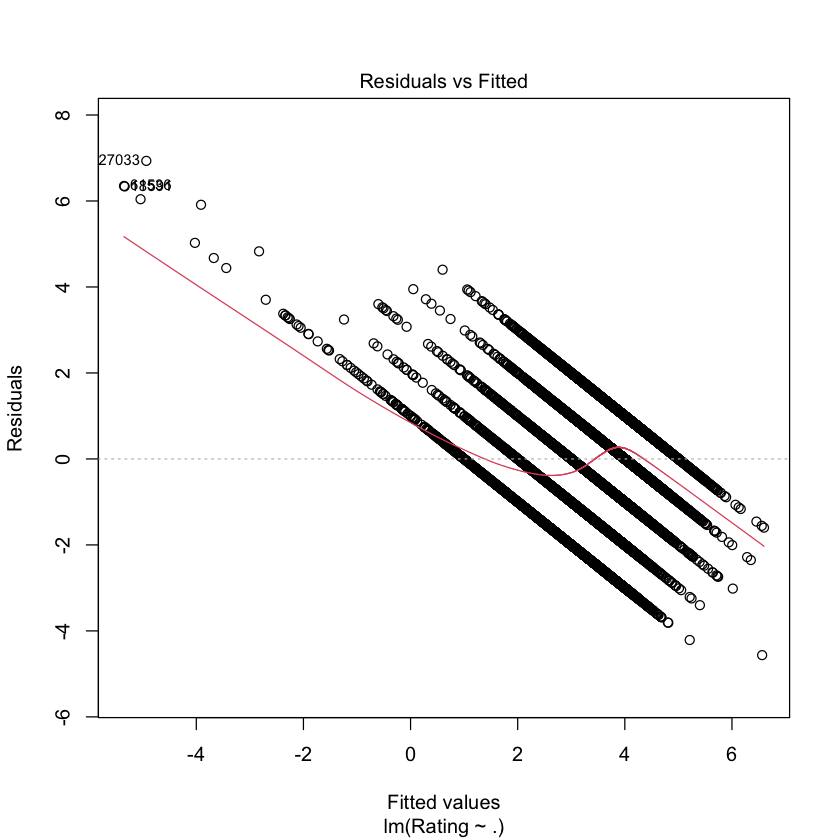

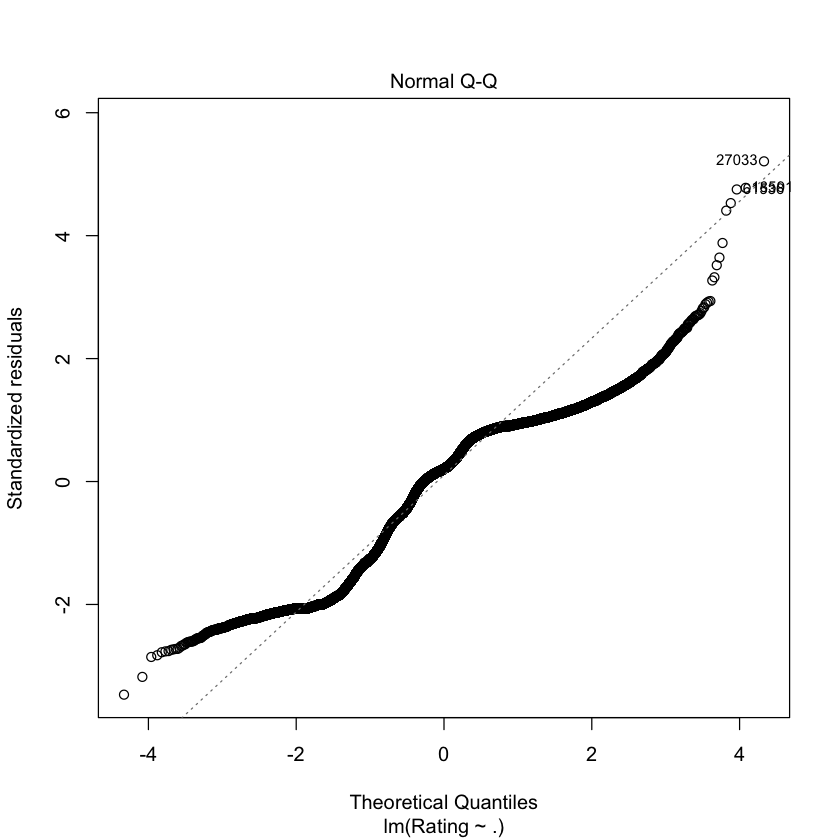

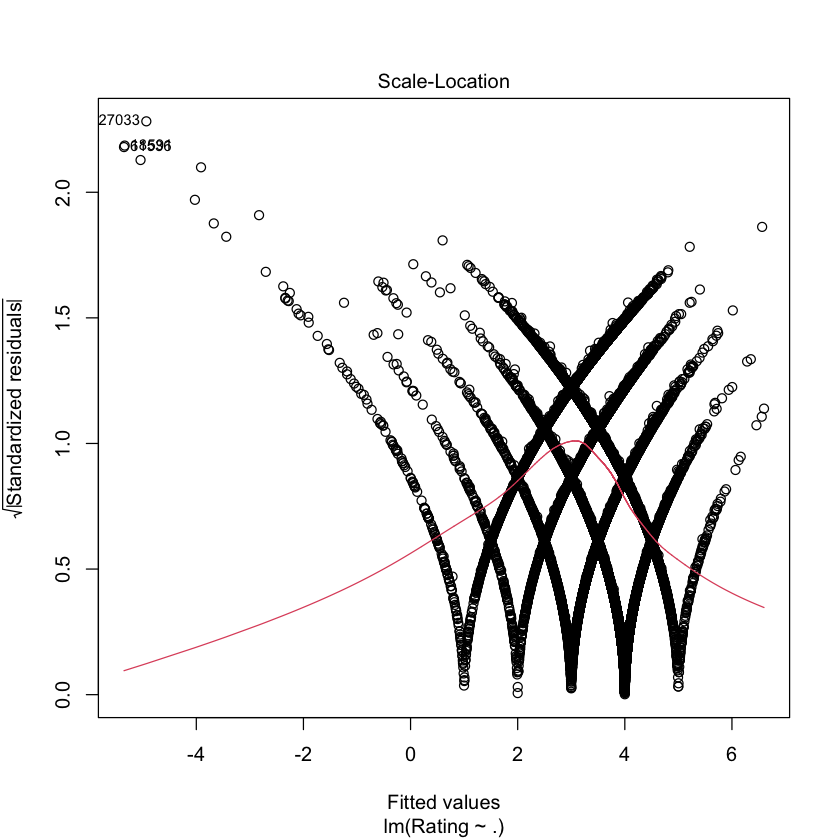

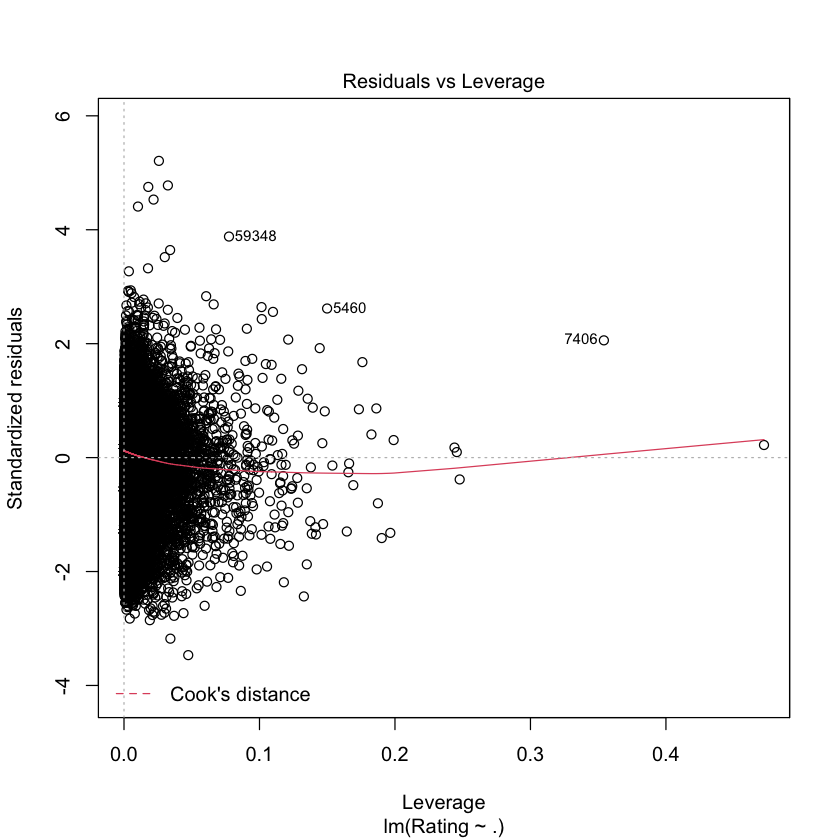

In [11]:
plot(Linear_Regression)

Saving 7 x 7 in image



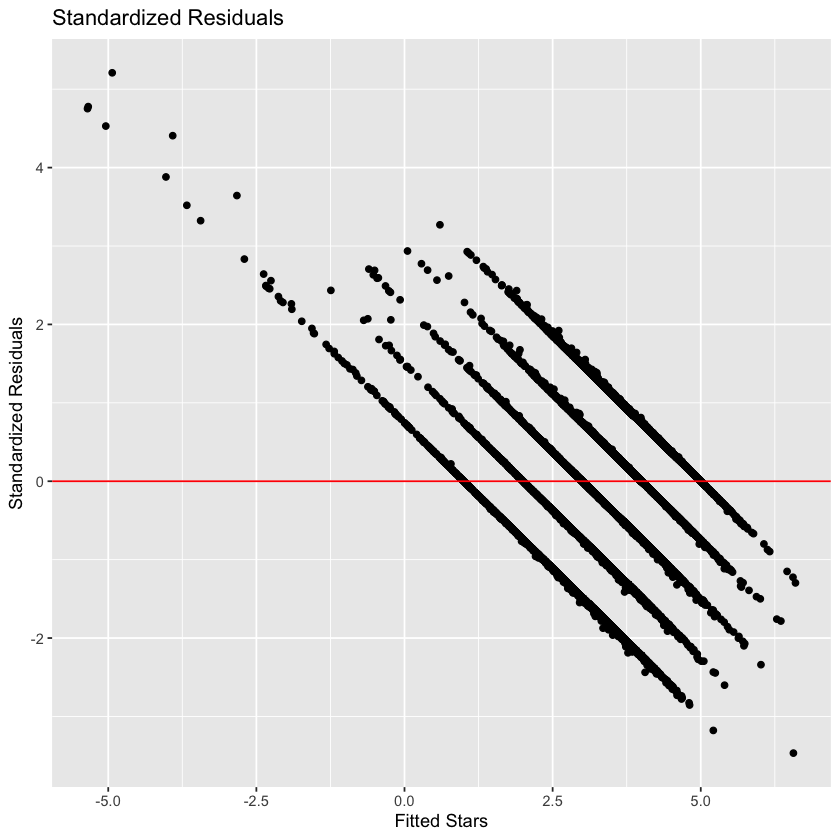

In [12]:

g=ggplot()+
geom_point(aes(x=predict(Linear_Regression),rstandard(Linear_Regression)))+
xlab("Fitted Stars")+
ylab("Standardized Residuals")+
ggtitle("Standardized Residuals")+
geom_hline(yintercept = 0,color="red")
ggsave("figure/Linear_Regression_Standardized_Residuals.jpeg",g)
g

pdf 
  2

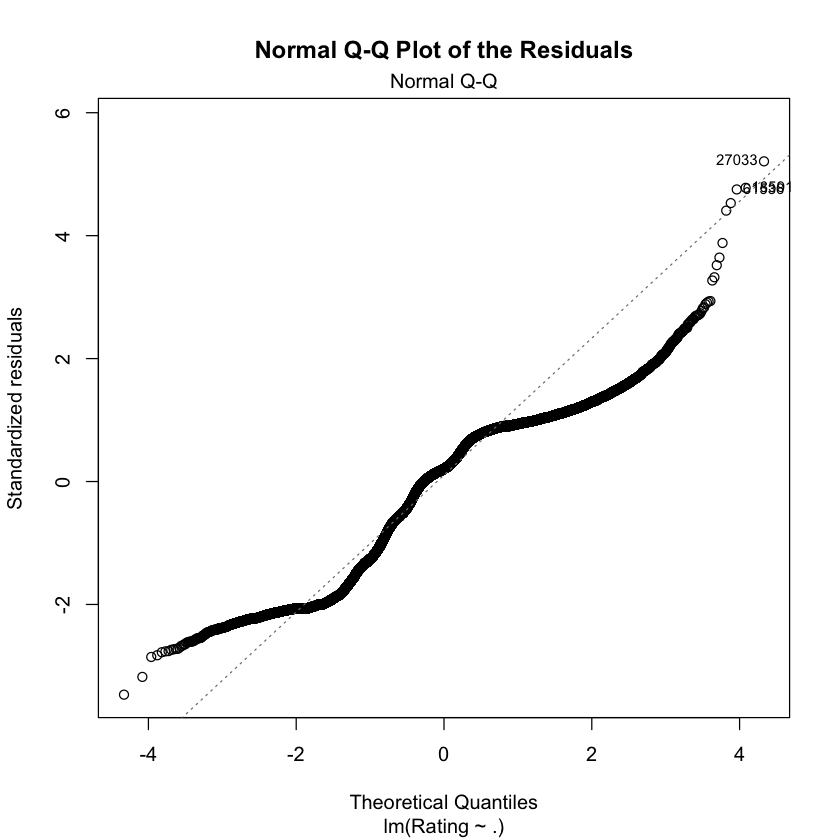

In [13]:
plot(Linear_Regression, which=c(2),main="Normal Q-Q Plot of the Residuals")
jpeg(file="figure/Linear_Regression|_QQPLOT.jpeg")
plot(Linear_Regression, which=c(2),main="Normal Q-Q Plot of the Residuals")
dev.off()

As you can see, for assumption of linear regression, our model cannot meets the assumptions well, especially the normality assumptions. Therefore we have no idea whether linear regression is a good method.

In [14]:
Linear_Regression_Results=summary(Linear_Regression)$coefficients
colnames(Linear_Regression_Results)=c("Linear_Coefficients","Linear_STD_Error","Linear_T_Value","Linear_P_Value")
Linear_Regression_Results

,Linear_Coefficients,Linear_STD_Error,Linear_T_Value,Linear_P_Value
(Intercept),3.7839558286,0.008726490,433.6171405,0.000000e+00
pizza,-0.0008060839,0.003399419,-0.2371240,8.125613e-01
food,-0.0872413105,0.006694631,-13.0315329,9.027827e-39
cheese,-0.0544523392,0.009233757,-5.8970949,3.717281e-09
sauce,-0.0358264526,0.009655418,-3.7105024,2.070157e-04
service,-0.0930966007,0.009699394,-9.5981876,8.404023e-22
salad,0.0323699937,0.010250958,3.1577530,1.590608e-03
restaurant,-0.0403520356,0.010344628,-3.9007720,9.598011e-05
crust,0.0837428838,0.011355156,7.3748775,1.663913e-13
chicken,0.0068566153,0.011069212,0.6194312,5.356344e-01


# Logistic Regression

The second method is logistic regression. Because all review rating is from 1 to 5, in fact we can class rating from 1 and 2 as 0, which means negative rating and rating from 3 to 5 as 1, which means positive rating. We want to use Logistic Regression to find any connection between Rating and Words.

In [15]:
Word_Data_log=Word_Data

In [16]:
Word_Data_log$Rating=(sign(Word_Data_log$Rating-2.5)+1)/2

In [17]:
Word_Data_log

Rating,pizza,food,cheese,sauce,service,salad,restaurant,crust,chicken,⋯,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,hash,romaine
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [18]:
Logistic_Regression=glm(Rating~., data = Word_Data_log, family = "binomial")

In [19]:
summary(Logistic_Regression)


Call:
glm(formula = Rating ~ ., family = "binomial", data = Word_Data_log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3792   0.1374   0.5830   0.7171   3.7981  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.2373093  0.0166571  74.281  < 2e-16 ***
pizza         0.0040055  0.0066815   0.599 0.548848    
food         -0.1727441  0.0124194 -13.909  < 2e-16 ***
cheese       -0.0965655  0.0178402  -5.413 6.20e-08 ***
sauce        -0.0637613  0.0189364  -3.367 0.000760 ***
service      -0.1151315  0.0178163  -6.462 1.03e-10 ***
salad         0.1002517  0.0210342   4.766 1.88e-06 ***
restaurant   -0.1097289  0.0202070  -5.430 5.63e-08 ***
crust         0.2418311  0.0245528   9.849  < 2e-16 ***
chicken       0.0358547  0.0221402   1.619 0.105353    
beer          0.2883591  0.0248152  11.620  < 2e-16 ***
menu          0.1753211  0.0261458   6.706 2.01e-11 ***
delivery     -0.3691580  0.0220254 -16.761  < 2e-16 ***
staff      

In [20]:
confusion_matrix(Logistic_Regression)

,Predicted 0,Predicted 1,Total
Actual 0,3196,12755,15951
Actual 1,1399,49819,51218
Total,4595,62574,67169


Setting levels: control = 0, case = 1

Setting direction: controls < cases



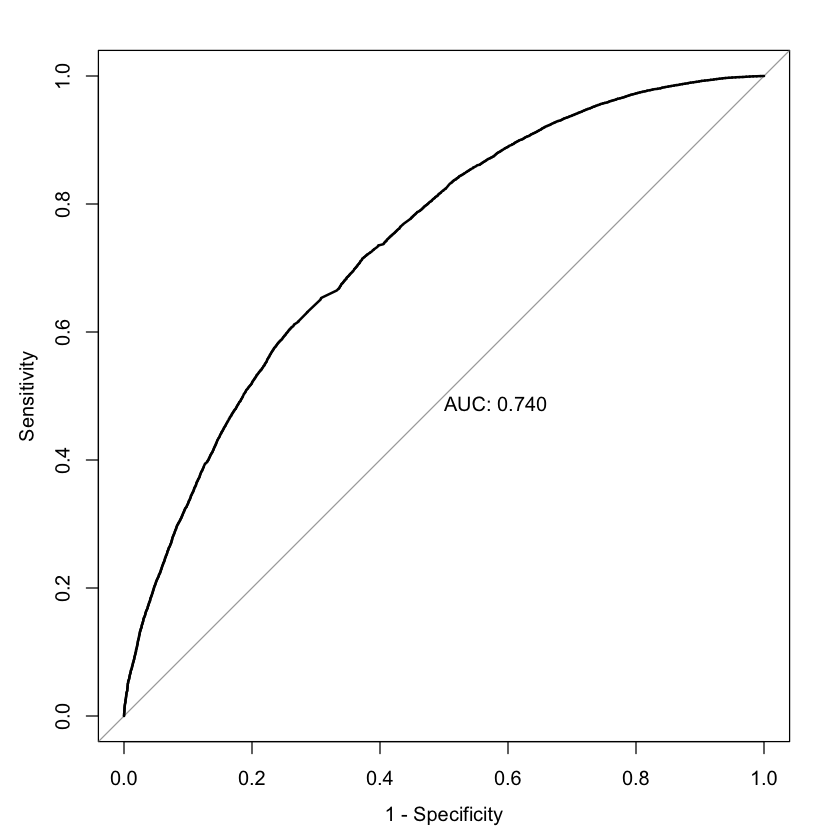

In [21]:
model.ROC = roc(Word_Data_log$Rating~fitted(Logistic_Regression)) 
plot(model.ROC,legacy.axes=T,print.auc=T) 

As you can see in the ROC plots and confusion matrix, the logistic regression perform a little well than linear regression.

In [22]:
Logistic_Regression_Results=summary(Logistic_Regression)$coefficients
colnames(Logistic_Regression_Results)=c("Logistic_Coefficients","Logistic_STD_Error","Logistic_Z_Value","Logistic_P_Value")
Logistic_Regression_Results

,Logistic_Coefficients,Logistic_STD_Error,Logistic_Z_Value,Logistic_P_Value
(Intercept),1.237309308,0.01665706,74.2813785,0.000000e+00
pizza,0.004005497,0.00668154,0.5994871,5.488481e-01
food,-0.172744146,0.01241942,-13.9091991,5.569967e-44
cheese,-0.096565518,0.01784016,-5.4128168,6.204096e-08
sauce,-0.063761340,0.01893645,-3.3671224,7.595696e-04
service,-0.115131457,0.01781629,-6.4621443,1.032296e-10
salad,0.100251657,0.02103422,4.7661217,1.878059e-06
restaurant,-0.109728899,0.02020704,-5.4302306,5.628128e-08
crust,0.241831102,0.02455279,9.8494332,6.893162e-23
chicken,0.035854691,0.02214019,1.6194393,1.053528e-01


# T Test & Wilcoxon Test

Here we test the significant of difference between star rating with a target noun and without a target noun by T test. 

In [23]:
Word_Data

Rating,pizza,food,cheese,sauce,service,salad,restaurant,crust,chicken,⋯,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,hash,romaine
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [61]:
T_Test_P_Value=c()
Wilcoxon_Test_P_Value=c()
Mean_Difference=c()
for(i in 2:(length(Word_Data))){
    Rating_With=Word_Data[which(Word_Data[,i]>0),]$Rating
    Rating_Without=Word_Data[which(Word_Data[,i]==0),]$Rating
    T_Test_P_Value=c(T_Test_P_Value,t.test(Rating_With,Rating_Without,alternative = c("two.sided"),mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)$p.value)
    Wilcoxon_Test_P_Value=c(Wilcoxon_Test_P_Value,wilcox.test(Rating_With,Rating_Without, alternative = "two.sided",mu = 0, paired = FALSE, conf.level = 0.95)$p.value)
    Mean_Difference=c(Mean_Difference,mean(Rating_With)-mean(Rating_Without))
}

In [69]:
Linear_Results=Linear_Regression_Results[-1,]
Logistic_Results=Logistic_Regression_Results[-1,]
Linear_Sig=Linear_Results[,4]<0.05
Logistic_Sig=Logistic_Results[,4]<0.05
T_Sig=T_Test_P_Value<0.05
Wilcoxon_Sig=Wilcoxon_Test_P_Value<0.05

In [70]:
Final_Results=cbind(Linear_Results,Logistic_Results,T_Test_P_Value,Wilcoxon_Test_P_Value,Mean_Difference,Linear_Sig,Logistic_Sig,T_Sig,Wilcoxon_Sig)

In [81]:
Final_Results

,Linear_Coefficients,Linear_STD_Error,Linear_T_Value,Linear_P_Value,Logistic_Coefficients,Logistic_STD_Error,Logistic_Z_Value,Logistic_P_Value,T_Test_P_Value,Wilcoxon_Test_P_Value,Mean_Difference,Linear_Sig,Logistic_Sig,T_Sig,Wilcoxon_Sig
pizza,-0.0008060839,0.003399419,-0.2371240,8.125613e-01,0.004005497,0.00668154,0.5994871,5.488481e-01,1.447951e-91,1.666769e-71,0.235246452,0,0,1,1
food,-0.0872413105,0.006694631,-13.0315329,9.027827e-39,-0.172744146,0.01241942,-13.9091991,5.569967e-44,3.615010e-46,3.791716e-49,-0.165954551,1,1,1,1
cheese,-0.0544523392,0.009233757,-5.8970949,3.717281e-09,-0.096565518,0.01784016,-5.4128168,6.204096e-08,2.879681e-01,1.272903e-03,0.014924441,1,1,0,1
sauce,-0.0358264526,0.009655418,-3.7105024,2.070157e-04,-0.063761340,0.01893645,-3.3671224,7.595696e-04,4.370691e-02,1.910019e-02,0.027707339,1,1,1,1
service,-0.0930966007,0.009699394,-9.5981876,8.404023e-22,-0.115131457,0.01781629,-6.4621443,1.032296e-10,6.468609e-55,9.357994e-57,-0.202966058,1,1,1,1
salad,0.0323699937,0.010250958,3.1577530,1.590608e-03,0.100251657,0.02103422,4.7661217,1.878059e-06,2.674300e-13,1.967012e-03,0.110601181,1,1,1,1
restaurant,-0.0403520356,0.010344628,-3.9007720,9.598011e-05,-0.109728899,0.02020704,-5.4302306,5.628128e-08,2.394078e-17,2.587459e-20,-0.136832742,1,1,1,1
crust,0.0837428838,0.011355156,7.3748775,1.663913e-13,0.241831102,0.02455279,9.8494332,6.893162e-23,1.215038e-80,3.283467e-32,0.262651059,1,1,1,1
chicken,0.0068566153,0.011069212,0.6194312,5.356344e-01,0.035854691,0.02214019,1.6194393,1.053528e-01,1.595397e-04,5.874465e-01,0.066596850,0,0,1,0
beer,0.0628330036,0.010395846,6.0440494,1.510856e-09,0.288359071,0.02481519,11.6202662,3.251217e-31,2.010260e-54,9.699655e-13,0.245844416,1,1,1,1
